In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD PHENO

In [197]:
pheno_p = '/Users/harveyaa/Documents/masters/data/pheno_26-01-22.csv'
pheno = pd.read_csv(pheno_p,index_col=0)

datasets_p ='/Users/harveyaa/Documents/masters/neuropsych_mtl/datasets/{}.txt'

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_62559/2794670915.py:2: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv(pheno_p,index_col=0)


# ES PLOT

In [198]:
table = pd.read_csv('./results/mtd_table.csv',index_col=0)
table['err'] = table['ci_95'] - table['ci_5']
cases = ['DUP15q13_3_CHRNA7', 'DEL2q13', 'DUP15q11_2', 'DUP2q13', 'DUP16p13_11', 'TAR_dup', 'DUP13q12_12','DEL13q12_12', 
        'DEL15q11_2','DUP16p11_2', 'DUP22q11_2', 'DEL1q21_1',
       'DUP1q21_1', 'DEL16p11_2', 'DEL22q11_2',
       'ADHD',
       'ASD',
       'SZ',
       'BIP']
table.loc[cases]

,mtd_std,mtd,p_permut,fdr,ci_5,ci_95,err
DUP15q13_3_CHRNA7,0.106261,0.024656,0.855829,0.0,0.144104,0.182692,0.038588
DEL2q13,0.107843,0.024989,0.874225,0.0,0.145266,0.186049,0.040782
DUP15q11_2,0.159217,0.038388,0.035993,0.0,0.189115,0.245761,0.056646
DUP2q13,0.178627,0.041533,0.311538,0.0,0.211111,0.279342,0.068231
DUP16p13_11,0.255509,0.059901,0.374725,0.0,0.306844,0.425955,0.119111
TAR_dup,0.279564,0.064035,0.797840,0.0,0.345256,0.469213,0.123958
DUP13q12_12,0.311164,0.070466,0.969006,0.0,0.381096,0.598574,0.217477
DEL13q12_12,0.339890,0.079366,0.495901,0.0,0.394815,0.620942,0.226127
DEL15q11_2,0.199066,0.046352,0.015997,1.0,0.227023,0.295435,0.068412
DUP16p11_2,0.377355,0.087058,0.004799,7.0,0.442415,0.576966,0.134551


/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_62559/3327275563.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cases,rotation=270)


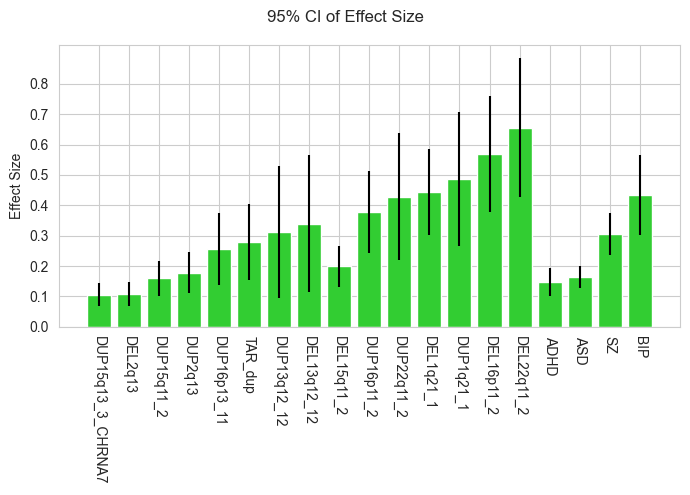

In [200]:
#sns.barplot(data = table.loc[order],y='mtd_std',errwidth='err')
fig, ax = plt.subplots(figsize=(7,5))
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.set_style('whitegrid')
plt.bar(x = table.loc[cases].index, height=table.loc[cases]['mtd_std'],yerr=table.loc[cases]['err'],color='limegreen')
ax.set_xticklabels(cases,rotation=270)
plt.ylabel('Effect Size')
plt.suptitle('95% CI of Effect Size')
plt.tight_layout()
plt.savefig('./results/effect_size_ci.png',dpi=300)


# DATASET DESCRIPTION TABLE

In [203]:
all_groups = cases + ['non_carriers','CON_IPC']
n_tot = pheno[all_groups].sum()
n_sex = pheno.groupby('SEX')[all_groups].sum()

cont_mean = []
cont_var = []
sites = []
for group in all_groups:
    cont_mean.append(pheno.groupby(group).mean()[['AGE','mean_conn','FD_scrubbed']].loc[1])
    cont_var.append(pheno.groupby(group).var()[['AGE','mean_conn','FD_scrubbed']].loc[1])
    sites.append(pheno[pheno[group]==1]['SITE'].unique())
cont_mean = pd.concat(cont_mean,axis=1,keys=all_groups).transpose()
cont_var = pd.concat(cont_var,axis=1,keys=all_groups).transpose()
cont_mean.rename({'AGE':'AGE_mean','mean_conn':'mean_conn_mean','FD_scrubbed':'FD_scrubbed_mean'},axis='columns',inplace=True)
cont_var.rename({'AGE':'AGE_var','mean_conn':'mean_conn_var','FD_scrubbed':'FD_scrubbed_var'},axis='columns',inplace=True)

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_62559/2559240932.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cont_mean.append(pheno.groupby(group).mean()[['AGE','mean_conn','FD_scrubbed']].loc[1])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_62559/2559240932.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cont_var.append(pheno.groupby(group).var()[['AGE','mean_conn','FD_scrubbed']].loc[1])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_62559/2559240932.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future v

In [207]:
df = pd.concat([n_tot.transpose(),n_sex.transpose(),cont_mean,cont_var],axis=1)
df['sites'] = sites
df.rename({0:'n_tot'},axis='columns',inplace=True)
df.to_csv('./results/table.csv')
df

,n_tot,Female,Male,AGE_mean,mean_conn_mean,FD_scrubbed_mean,AGE_var,mean_conn_var,FD_scrubbed_var,sites
DUP15q13_3_CHRNA7,191.0,100.0,91.0,64.343745,0.419016,0.193047,53.541361,0.014444,0.002613,"[UKBB11027, UKBB11026, UKBB11025, HSJ]"
DEL2q13,183.0,110.0,73.0,63.055085,0.429333,0.187172,52.485544,0.016314,0.002430,"[UKBB11027, UKBB11025, UKBB11026]"
DUP15q11_2,136.0,76.0,60.0,63.711733,0.406493,0.189497,51.679820,0.017547,0.002729,"[UKBB11025, UKBB11026, UKBB11027]"
DUP2q13,88.0,43.0,45.0,64.682582,0.415949,0.185450,58.031114,0.016534,0.002266,"[UKBB11025, UKBB11027, UKBB11026]"
DUP16p13_11,41.0,21.0,20.0,63.987810,0.384560,0.185417,59.315841,0.016604,0.001845,"[UKBB11025, UKBB11027, UKBB11026, HSJ]"
TAR_dup,29.0,14.0,15.0,59.847979,0.416091,0.172643,56.899662,0.011355,0.002916,"[UKBB11025, UKBB11027, UKBB11026]"
DUP13q12_12,20.0,10.0,10.0,60.837366,0.487824,0.200112,53.914000,0.017251,0.003556,"[UKBB11025, UKBB11026, UKBB11027]"
DEL13q12_12,22.0,12.0,10.0,63.542155,0.423733,0.196252,34.334408,0.020901,0.005118,"[UKBB11025, UKBB11027, UKBB11026]"
DEL15q11_2,103.0,55.0,48.0,64.291575,0.425977,0.192926,55.328642,0.019004,0.003070,"[UKBB11025, UKBB11026, UKBB11027]"
DUP16p11_2,35.0,14.0,21.0,34.149868,0.312095,0.212734,381.435499,0.014138,0.008231,"[UKBB11027, UKBB11026, UKBB11025, HSJ, Svip1, ..."


# MTD CV TABLE

In [214]:
df = pd.read_csv('./results/mtd_cv_table.csv',index_col=0)
df

,mtd_std,cv_2,cv_5,cv_10
DUP15q13_3_CHRNA7,0.106261,0.056475,0.108711,0.151868
DEL2q13,0.107843,0.060962,0.108220,0.150778
DUP15q11_2,0.159217,0.078190,0.128037,0.171394
DUP2q13,0.178627,0.103021,0.155467,0.216836
DUP16p13_11,0.255509,0.132079,0.208378,0.304292
TAR_dup,0.279564,0.155421,0.310270,0.400604
DUP13q12_12,0.311164,0.198509,0.327515,0.463617
DEL13q12_12,0.339890,0.179324,0.307112,0.416648
DEL15q11_2,0.199066,0.107594,0.152284,0.211196
DUP16p11_2,0.377355,0.272697,0.414156,0.529876


In [215]:
df['cv_10_filt'] = df['cv_10']
df['cv_10_filt'].loc['DEL22q11_2'] = np.nan
df

,mtd_std,cv_2,cv_5,cv_10,cv_10_filt
DUP15q13_3_CHRNA7,0.106261,0.056475,0.108711,0.151868,0.151868
DEL2q13,0.107843,0.060962,0.108220,0.150778,0.150778
DUP15q11_2,0.159217,0.078190,0.128037,0.171394,0.171394
DUP2q13,0.178627,0.103021,0.155467,0.216836,0.216836
DUP16p13_11,0.255509,0.132079,0.208378,0.304292,0.304292
TAR_dup,0.279564,0.155421,0.310270,0.400604,0.400604
DUP13q12_12,0.311164,0.198509,0.327515,0.463617,0.463617
DEL13q12_12,0.339890,0.179324,0.307112,0.416648,0.416648
DEL15q11_2,0.199066,0.107594,0.152284,0.211196,0.211196
DUP16p11_2,0.377355,0.272697,0.414156,0.529876,0.529876


/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_62559/1598617732.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=270)


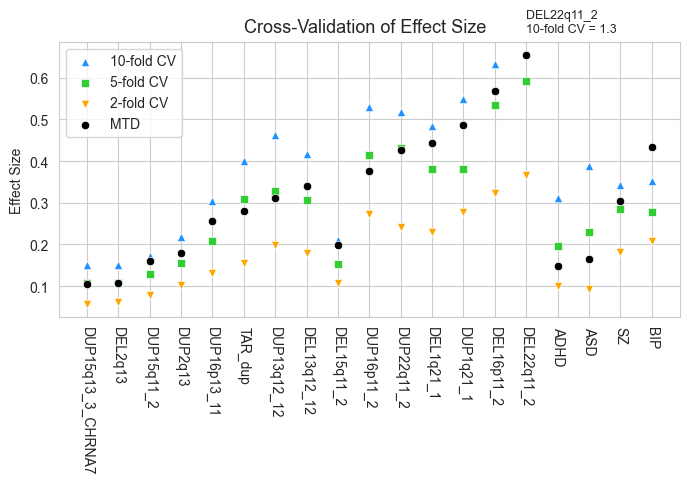

In [202]:
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
colors2 = ['dodgerblue','limegreen','orange','black','forestgreen']
cp = sns.color_palette(colors2)
sns.set_palette(cp)
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data = df, x = df.index,y = 'cv_10_filt',label='10-fold CV',marker='^')
sns.scatterplot(data = df, x = df.index,y = 'cv_5',label='5-fold CV',marker='s')
sns.scatterplot(data = df, x = df.index,y = 'cv_2',label='2-fold CV',marker='v')
sns.scatterplot(data = df, x = df.index,y = 'mtd_std',label='MTD')
plt.legend(loc='upper left')
ax.set_xticklabels(df.index, rotation=270)
ax.set_ylabel('Effect Size')
plt.text(5,0.71,'Cross-Validation of Effect Size',fontsize=13)
plt.text(14,0.71,'DEL22q11_2\n10-fold CV = 1.3', fontsize=9)
plt.tight_layout()
plt.savefig('./results/effect_size_cv.png',dpi=300)